In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA # for PCA calculation
%matplotlib inline


In [2]:
source = "../merged_mw/"
# family = ["tsunami/"]
family = ["stak/","tsunami/","mirai2/","drtycow/","ezuriloader/","flood/","cephei/"]
malware = {}
for f in family:
    malware[f] = {}

In [3]:
for f in family:
    src = source+f
    print(f)
    fam = pd.DataFrame()
    for file in os.listdir(src):
        print(file)
        df = pd.read_csv(src+file)
        df.drop('Unnamed: 0',axis=1,inplace=True)
        df.dropna(inplace=True)
        print(df.size)
        df[['branch-instructions','branch-misses','bus-cycles']] = df[['branch-instructions','branch-misses','bus-cycles']].div(df['instructions1'],axis=0)
        df[['cache-references','cpu-cycles','ref-cycles']] = df[['cache-references','cpu-cycles','ref-cycles']].div(df['instructions2'],axis=0)
        df[['L1-dcache-load-misses','L1-dcache-loads','L1-dcache-stores']] = df[['L1-dcache-load-misses','L1-dcache-loads','L1-dcache-stores']].div(df['instructions3'],axis=0)
        df[['LLC-load-misses','LLC-loads','LLC-store-misses']] = df[['LLC-load-misses','LLC-loads','LLC-store-misses']].div(df['instructions4'],axis=0)
        df[['branch-load-misses','branch-loads','dTLB-load-misses']] = df[['branch-load-misses','branch-loads','dTLB-load-misses']].div(df['instructions5'],axis=0)
        df[['dTLB-store-misses','dTLB-stores','iTLB-load-misses']] = df[['dTLB-store-misses','dTLB-stores','iTLB-load-misses']].div(df['instructions6'],axis=0)
        df[['node-load-misses','node-loads','node-store-misses']] = df[['node-load-misses','node-loads','node-store-misses']].div(df['instructions7'],axis=0)
        df[['mem-loads','mem-stores']] = df[['mem-loads','mem-stores']].div(df['instructions8'],axis=0)
        df[['cache-misses','L1-icache-load-misses','LLC-stores']] = df[['cache-misses','L1-icache-load-misses','LLC-stores']].div(df['instructions9'],axis=0)
        df[['dTLB-loads','iTLB-loads','node-stores']] = df[['dTLB-loads','iTLB-loads','node-stores']].div(df['instructions10'],axis=0)
        df = df.drop(['instructions1','instructions2','instructions3','instructions4','instructions6','instructions7','instructions8','instructions9','instructions10'],axis=1)
        
        
        # row_count = len(df)
        # df.insert(loc = 0, column = 'family', value = file)
        # df.insert(loc = 1, column = 'timestamp', value = [100 * i for i in range(row_count)])
        
        fam = pd.concat([fam, df])
        
    fam = fam.reset_index(drop=True)
    malware[f]=fam

stak/
f12fc2ed61b61fe0be5500aaaa9707acebe5802d83895e87a0faebf77a59323c_
19656
e3f90c676c4945fa685e6d61689d8dfb8cb4a496816b76b1eff12f63861c217c_
20865
a663c9cc2631de038106da41912cf7144a3e67a5faa783413172b0536a88c6f0_
16341
4309d17a3e2376639026494a47c5d4a68f481f1ab0eea5104cb58c5412e290ff_
23283
912f27b311f90e81c135f2d363e06db44aaf4067501971703c6335e85a26e8bb_
11700
4ed03737803160dc63a560169c3cd224d0809e8a54cd8fa6fa85fc4a911971dc_
22542
3ff6b4287e49a01724626a9e11adceee7a478aa5e5778ec139a3f9011a02f3af_
23127
tsunami/
3668b167f5c9083a9738cfc4bd863a07379a5b02ee14f48a10fb1240f3e421a6_
23322
305901aa920493695729132cfd20cbddc9db2cf861071450a646c6a07b4a50f3_
23322
cd1802e96d552915d35868034f64d617bf385a28202234736a4c23b320bc6213_
23322
d313859c242add69d6534f497a256607cf9611fadf06868a1e499c50556e3d3a_
23322
tsunami_
23322
mirai2/
93952d715801eba4b1b346ac90dbd9ab1df809bec4d14607163c932f2260da73_
23244
b6984474b33ca3f299ff586dae6822ed70d297803258e860c2a3a1e47abbf915_
23283
drtycow/
0b22cdc1b1b1f944e

In [25]:
malware['ezuriloader/'].shape

(6, 30)

In [10]:
for keys in malware:
    print(keys)
    print(len(malware[keys]))

stak/
3526
tsunami/
2990
mirai2/
1193
drtycow/
595
ezuriloader/
6
flood/
595
cephei/
596


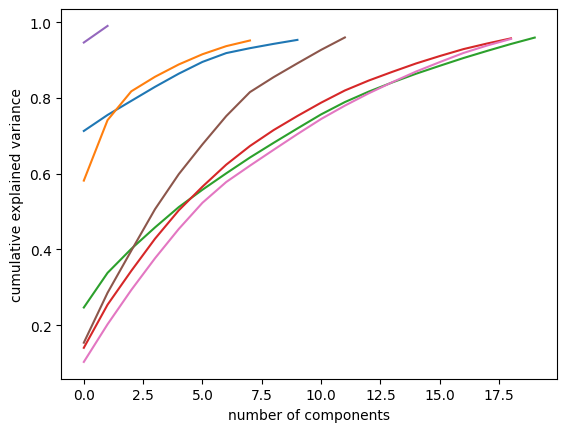

In [11]:
# fig,axes = 
fig = plt.figure()
for f in malware:
    fam = malware[f]
    fam_cols = list(fam.columns)
    fam2 = fam[fam_cols[2:]]
    X = fam2.values
    sc = StandardScaler()
    x_std = sc.fit_transform(X)
    pca = PCA(n_components=0.95)
    pca.fit(x_std)
    plt.plot(np.cumsum(pca.explained_variance_ratio_),label=f)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()


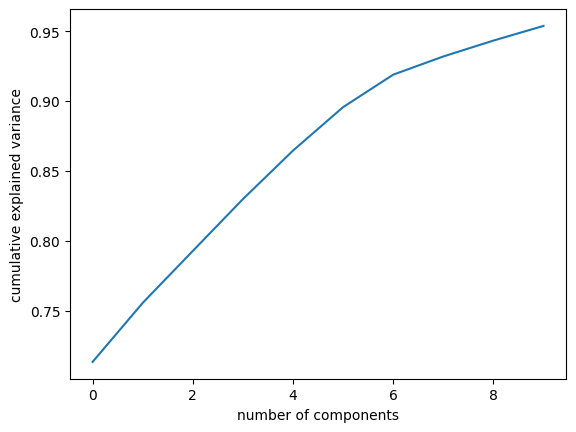

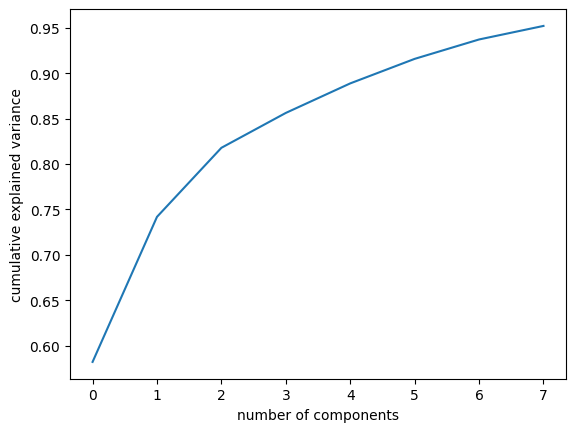

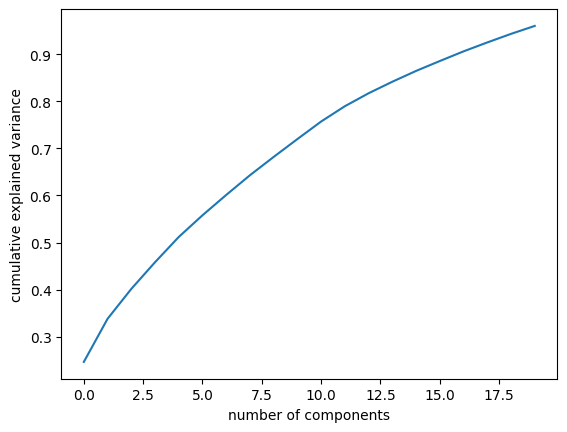

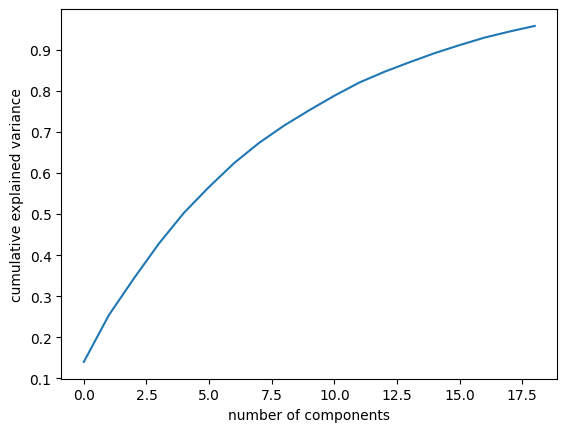

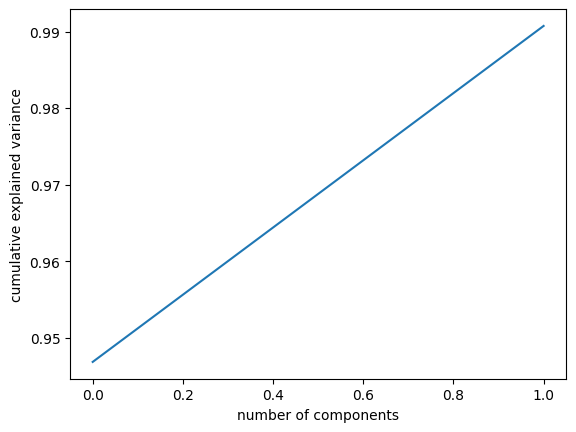

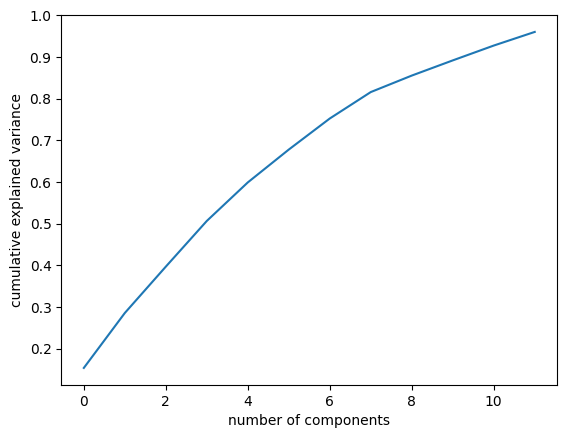

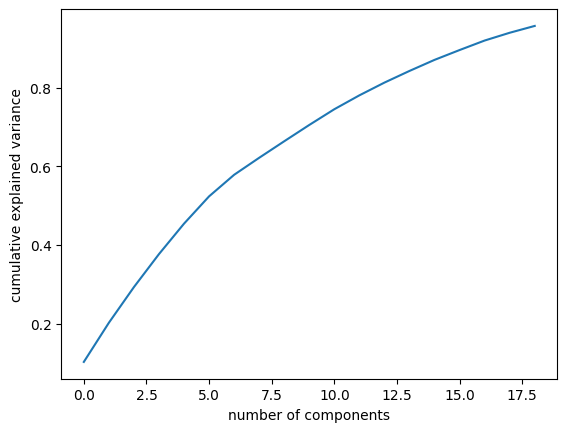

In [12]:
for f in malware:
    fam = malware[f]
    fam_cols = list(fam.columns)
    fam2 = fam[fam_cols[2:]]
    X = fam2.values
    sc = StandardScaler()
    x_std = sc.fit_transform(X)
    pca = PCA(n_components=0.95)
    pca.fit(x_std)
    plt.plot(np.cumsum(pca.explained_variance_ratio_),label=f)
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');
    plt.show()

In [4]:
for f in malware:
    print(f)
    X = malware[f].values
    sc = StandardScaler()
    x_std = sc.fit_transform(X)
    pca = PCA(n_components=6)
    pca.fit(x_std)
    # print(pca.n_components_)
    # print(pca.components_)
    most_important = [np.abs(pca.components_[i]).argmax() for i in range(pca.n_components_)]
    # print(pca.explained_variance_ratio_)
    # print(len(set(most_important)))
    initial_feature_names = df.columns
    most_important_names = [initial_feature_names[most_important[i]] for i in range(pca.n_components_)]
    print(len(set(most_important_names)))
    print(set(most_important_names))

stak/
6
{'LLC-store-misses', 'L1-icache-load-misses', 'node-stores', 'node-store-misses', 'ref-cycles', 'node-load-misses'}
tsunami/
6
{'branch-loads', 'node-store-misses', 'L1-dcache-load-misses', 'ref-cycles', 'dTLB-store-misses', 'iTLB-load-misses'}
mirai2/
6
{'cpu-cycles', 'LLC-store-misses', 'L1-icache-load-misses', 'instructions5', 'branch-instructions', 'iTLB-load-misses'}
drtycow/
5
{'L1-dcache-stores', 'instructions5', 'branch-misses', 'dTLB-store-misses', 'cache-references'}
ezuriloader/
6
{'instructions5', 'ref-cycles', 'bus-cycles', 'branch-misses', 'LLC-load-misses', 'mem-stores'}
flood/
6
{'L1-dcache-stores', 'dTLB-load-misses', 'node-stores', 'dTLB-store-misses', 'branch-misses', 'dTLB-stores'}
cephei/
6
{'cpu-cycles', 'dTLB-load-misses', 'branch-load-misses', 'LLC-loads', 'branch-misses', 'iTLB-load-misses'}


In [ ]:
# compare Across malware Families.

stak/
tsunami/
mirai2/
drtycow/
ezuriloader/
flood/
cephei/


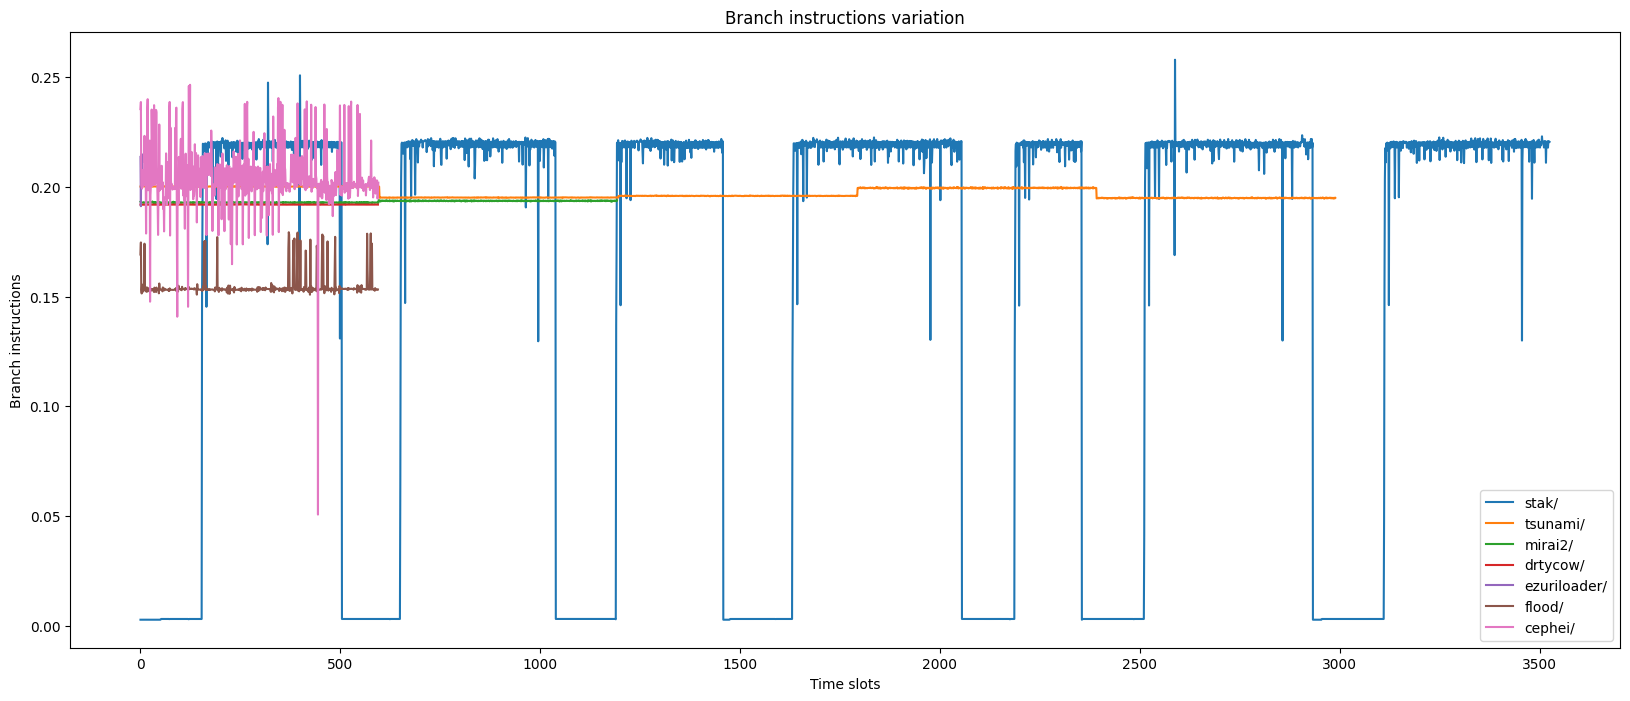

In [68]:
plt.figure(figsize=(20, 8))
for f in malware:
    print(f)
    fam = malware[f]
    plt.plot(fam['branch-instructions'],label=f)
plt.title('Branch instructions variation')
plt.ylabel('Branch instructions')
plt.xlabel('Time slots')
plt.grid(False)
plt.legend()
plt.show()


In [48]:
import pandas as pd

In [4]:
source = "../merged_mw/"
family = ["tsunami/"]
# family = ["stak/","tsunami/","mirai2/","drtycow/","ezuriloader/","flood/","cephei/"]
malware = {}
for f in family:
    malware[f] = {}

In [6]:
for f in family:
    src = source+f
    print(f)
    fam_file = pd.DataFrame()

    for file in os.listdir(src):
        print(file)
        df = pd.read_csv(src+file)
        df.drop('Unnamed: 0',axis=1,inplace=True)
        df.dropna(inplace=True)
        print(df.size)
        df[['branch-instructions','branch-misses','bus-cycles']] = df[['branch-instructions','branch-misses','bus-cycles']].div(df['instructions1'],axis=0)
        df[['cache-references','cpu-cycles','ref-cycles']] = df[['cache-references','cpu-cycles','ref-cycles']].div(df['instructions2'],axis=0)
        df[['L1-dcache-load-misses','L1-dcache-loads','L1-dcache-stores']] = df[['L1-dcache-load-misses','L1-dcache-loads','L1-dcache-stores']].div(df['instructions3'],axis=0)
        df[['LLC-load-misses','LLC-loads','LLC-store-misses']] = df[['LLC-load-misses','LLC-loads','LLC-store-misses']].div(df['instructions4'],axis=0)
        df[['branch-load-misses','branch-loads','dTLB-load-misses']] = df[['branch-load-misses','branch-loads','dTLB-load-misses']].div(df['instructions5'],axis=0)
        df[['dTLB-store-misses','dTLB-stores','iTLB-load-misses']] = df[['dTLB-store-misses','dTLB-stores','iTLB-load-misses']].div(df['instructions6'],axis=0)
        df[['node-load-misses','node-loads','node-store-misses']] = df[['node-load-misses','node-loads','node-store-misses']].div(df['instructions7'],axis=0)
        df[['mem-loads','mem-stores']] = df[['mem-loads','mem-stores']].div(df['instructions8'],axis=0)
        df[['cache-misses','L1-icache-load-misses','LLC-stores']] = df[['cache-misses','L1-icache-load-misses','LLC-stores']].div(df['instructions9'],axis=0)
        df[['dTLB-loads','iTLB-loads','node-stores']] = df[['dTLB-loads','iTLB-loads','node-stores']].div(df['instructions10'],axis=0)
        df = df.drop(['instructions1','instructions2','instructions3','instructions4','instructions6','instructions7','instructions8','instructions9','instructions10'],axis=1)
        malware[f][file]=df
        
        row_count = len(df)
        df.insert(loc = 0, column = 'family', value = file)
        df.insert(loc = 1, column = 'timestamp', value = [100 * i for i in range(row_count)])
        
        fam_file = pd.concat([fam_file, df])
        

tsunami/
3668b167f5c9083a9738cfc4bd863a07379a5b02ee14f48a10fb1240f3e421a6_
23322
305901aa920493695729132cfd20cbddc9db2cf861071450a646c6a07b4a50f3_
23322
cd1802e96d552915d35868034f64d617bf385a28202234736a4c23b320bc6213_
23322
d313859c242add69d6534f497a256607cf9611fadf06868a1e499c50556e3d3a_
23322
tsunami_
23322


In [7]:
fam_cols = list(fam_file.columns)
fam_file2 = fam_file.reset_index(drop=True)
fam_file2 = fam_file2[fam_cols[2:]]
fam_file2

,branch-instructions,branch-misses,bus-cycles,cache-references,cpu-cycles,ref-cycles,L1-dcache-load-misses,L1-dcache-loads,L1-dcache-stores,LLC-load-misses,...,node-loads,node-store-misses,mem-loads,mem-stores,cache-misses,L1-icache-load-misses,LLC-stores,dTLB-loads,iTLB-loads,node-stores
0,0.200207,0.003106,0.009615,0.126259,1.484563,1.334739,0.019821,0.276370,0.171950,0.000112,...,0.000118,0.0,0.0,0.171841,0.001529,0.081119,0.004018,0.276413,0.001273,0.000277
1,0.200207,0.003224,0.010654,0.122837,1.459600,1.308631,0.018244,0.276320,0.171938,0.000106,...,0.000097,0.0,0.0,0.171843,0.000870,0.079455,0.003883,0.276361,0.001291,0.000136
2,0.200162,0.002858,0.008641,0.126899,1.478841,1.282662,0.019283,0.276322,0.171860,0.000091,...,0.000086,0.0,0.0,0.171727,0.000661,0.079222,0.003895,0.276387,0.001297,0.000184
3,0.200273,0.002746,0.008482,0.125420,1.465402,1.271282,0.019694,0.276393,0.171832,0.000080,...,0.000081,0.0,0.0,0.171771,0.000562,0.078877,0.003874,0.276460,0.001297,0.000040
4,0.200256,0.002811,0.008571,0.122350,1.456662,1.265126,0.019658,0.276380,0.171770,0.000091,...,0.000079,0.0,0.0,0.172000,0.000712,0.080819,0.003766,0.276350,0.001287,0.000060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985,0.194738,0.002992,0.010695,0.214508,1.947592,1.893484,0.020625,0.264867,0.180420,0.000081,...,0.000116,0.0,0.0,0.180372,0.000511,0.083095,0.003884,0.265038,0.001055,0.000396
2986,0.195111,0.002962,0.011267,0.214022,1.946796,1.866249,0.020404,0.265154,0.180184,0.000079,...,0.000085,0.0,0.0,0.180140,0.000472,0.082809,0.003903,0.264811,0.001065,0.000219
2987,0.195018,0.002855,0.008918,0.212308,1.945578,1.854859,0.020468,0.264937,0.180304,0.000076,...,0.000081,0.0,0.0,0.180273,0.000587,0.082483,0.003988,0.264982,0.001080,0.000146
2988,0.194835,0.002786,0.008839,0.126697,1.552356,1.380401,0.020548,0.265106,0.180292,0.000089,...,0.000077,0.0,0.0,0.180246,0.000544,0.082386,0.003990,0.264195,0.001059,0.000088


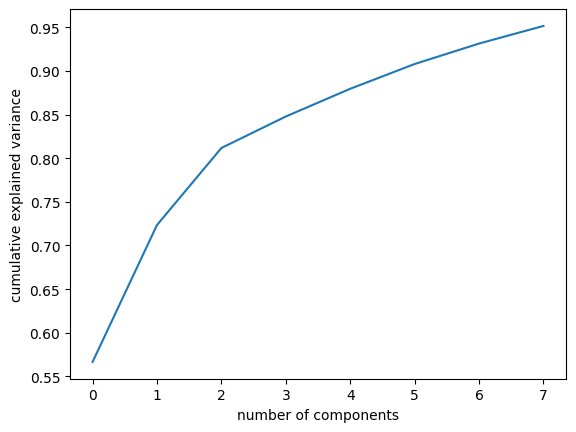

In [30]:
X = fam_file2.values
sc = StandardScaler()
x_std = sc.fit_transform(X)
pca = PCA(n_components=8)
pca.fit(x_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()


In [31]:
loadings = pca.components_
print(loadings)

[[ 1.70694333e-01 -1.39499958e-01 -1.32298161e-01 -2.37468878e-01
  -1.26982190e-01 -1.17005224e-01 -2.44793692e-01  1.88243317e-01
   1.99494335e-01  2.12919782e-01 -2.41987614e-01  2.19276363e-01
  -1.28350855e-01  1.69923271e-01  1.45345692e-01  2.38778846e-01
  -1.45038622e-01  1.99472203e-01 -8.77308916e-02  0.00000000e+00
   2.08685622e-01  1.49569522e-02  0.00000000e+00  1.99635912e-01
   2.15345656e-01 -2.17541698e-01 -2.42257563e-01  1.88442968e-01
  -2.40168932e-01  1.98354517e-01]
 [-5.98049813e-02  2.34383246e-01  3.11856558e-01  2.27392556e-02
   3.22709469e-01  3.04524886e-01 -2.54650029e-02  2.18672868e-01
  -1.36167809e-01  1.28511155e-01 -2.32905635e-02  1.42668238e-01
   2.06100340e-01 -6.13908843e-02  3.52193512e-01  8.48267006e-02
  -4.21249412e-02 -1.36348329e-01  3.74305294e-01 -0.00000000e+00
   1.67800616e-01  1.05599493e-02 -0.00000000e+00 -1.35491131e-01
   1.98136549e-01  7.68841759e-02 -1.47399314e-03  2.18071393e-01
   9.07742116e-02  2.38484611e-01]
 [-4.4

In [32]:
df_loadings = pd.DataFrame(loadings.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7','PC8'],index=fam_file2.columns)
df_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
branch-instructions,0.170694,-0.059805,-0.441941,-0.001810,0.078489,0.115748,-0.056978,0.157663
branch-misses,-0.139500,0.234383,0.009535,0.176916,-0.319834,0.503131,-0.353517,0.098912
bus-cycles,-0.132298,0.311857,0.097803,0.105467,-0.282171,0.355422,-0.252909,0.008667
cache-references,-0.237469,0.022739,-0.017442,-0.105942,0.234938,-0.009168,-0.110625,0.123816
cpu-cycles,-0.126982,0.322709,0.088671,-0.212390,0.425148,-0.035790,-0.144329,0.127886
ref-cycles,-0.117005,0.304525,0.096821,-0.235270,0.481137,-0.006066,-0.213400,0.183256
L1-dcache-load-misses,-0.244794,-0.025465,-0.028136,-0.000383,-0.005419,-0.000936,0.025513,-0.002391
L1-dcache-loads,0.188243,0.218673,-0.289899,0.046750,-0.017144,-0.097182,-0.004630,-0.056140
L1-dcache-stores,0.199494,-0.136168,0.328921,-0.055827,0.025009,0.105714,-0.016749,0.057873
LLC-load-misses,0.212920,0.128511,-0.032580,-0.045063,0.064602,0.130919,0.056001,0.014263


In [33]:
for col,row in df_loadings.iteritems():
    print(df_loadings[col].abs().idxmax())

L1-dcache-load-misses
iTLB-load-misses
branch-loads
node-store-misses
ref-cycles
dTLB-store-misses
branch-load-misses
dTLB-store-misses


/tmp/ipykernel_6168/1562386.py:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col,row in df_loadings.iteritems():


In [ ]:
# apply corelation matrix on sample.

In [9]:
pca = PCA(n_components=0.95)
pca.fit(x_std)
print(pca.n_components_)
print(pca.components_)
most_important = [np.abs(pca.components_[i]).argmax() for i in range(pca.n_components_)]
print(pca.explained_variance_ratio_)
print(most_important)
initial_feature_names = df.columns
most_important_names = [initial_feature_names[most_important[i]] for i in range(pca.n_components_)]
print(most_important_names)


8
[[ 1.70694333e-01 -1.39499958e-01 -1.32298161e-01 -2.37468878e-01
  -1.26982190e-01 -1.17005224e-01 -2.44793692e-01  1.88243317e-01
   1.99494335e-01  2.12919782e-01 -2.41987614e-01  2.19276363e-01
  -1.28350855e-01  1.69923271e-01  1.45345692e-01  2.38778846e-01
  -1.45038622e-01  1.99472203e-01 -8.77308916e-02 -0.00000000e+00
   2.08685622e-01  1.49569522e-02 -0.00000000e+00  1.99635912e-01
   2.15345656e-01 -2.17541698e-01 -2.42257563e-01  1.88442968e-01
  -2.40168932e-01  1.98354517e-01]
 [-5.98049813e-02  2.34383246e-01  3.11856558e-01  2.27392556e-02
   3.22709469e-01  3.04524886e-01 -2.54650029e-02  2.18672868e-01
  -1.36167809e-01  1.28511155e-01 -2.32905635e-02  1.42668238e-01
   2.06100340e-01 -6.13908843e-02  3.52193512e-01  8.48267006e-02
  -4.21249412e-02 -1.36348329e-01  3.74305294e-01  2.16765190e-33
   1.67800616e-01  1.05599493e-02 -7.29701556e-34 -1.35491131e-01
   1.98136549e-01  7.68841759e-02 -1.47399312e-03  2.18071393e-01
   9.07742116e-02  2.38484611e-01]
 [-4

           0         1         2         3         4         5         6  \
0   0.856129 -0.094109 -1.187791 -1.216388  1.591411 -0.613134  0.189928   
1  -0.540939 -1.670868 -0.955140 -1.438695  0.168313 -1.451020 -0.602310   
2   1.158087  0.161679 -0.653906  0.313928  2.782566 -0.567094  0.105075   
3   0.486957  0.443085  0.264342 -0.245432 -1.146906  0.908932  0.389379   
4  -0.771129 -2.071412  0.778687  0.357309 -0.913743 -2.015991 -0.564782   
5   1.850973 -0.589996  0.431902  1.507892  0.527153  0.007761  1.116336   
6  -1.142168 -0.851699 -0.316115 -0.417651 -1.528026 -0.918439 -0.117832   
7  -1.054159  0.972007 -2.799665  0.109125 -0.511321  0.496034 -0.010365   
8   0.288553  0.834146  0.117386  0.489088 -0.800562 -1.771910 -0.085023   
9  -0.468504  2.058852 -1.475599 -0.377985 -0.554546 -1.015980 -0.570319   
10  0.056780  0.589190  0.251045  1.300690 -0.335649 -0.296506 -0.057973   
11 -0.617821  0.734127 -0.781002 -0.887851 -1.455848 -0.150014  1.276039   
12 -0.850504

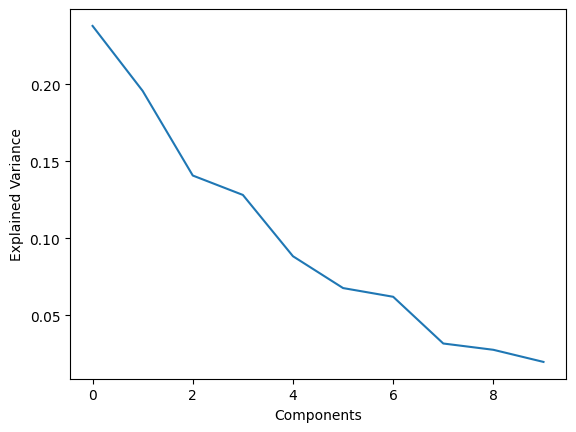

In [86]:
import pandas
from sklearn.decomposition import PCA
import numpy
import matplotlib.pyplot as plot

df = pandas.DataFrame(data=numpy.random.normal(0, 1, (20, 10)))
print((df))

# You must normalize the data before applying the fit method
df_normalized=(df - df.mean()) / df.std()
print(df_normalized)
pca = PCA(n_components=df.shape[1])
pca.fit(df_normalized)

# Reformat and view results
loadings = pandas.DataFrame(pca.components_.T,
columns=['PC%s' % _ for _ in range(len(df_normalized.columns))],
index=df.columns)
print(loadings)

print('--')
print(df.columns)
print(df_normalized.columns)

plot.plot(pca.explained_variance_ratio_)
plot.ylabel('Explained Variance')
plot.xlabel('Components')
plot.show()


                            PC0           PC1           PC2           PC3  \
branch-instructions    0.170694 -5.980498e-02 -4.419412e-01 -1.810165e-03   
branch-misses         -0.139500  2.343832e-01  9.534894e-03  1.769157e-01   
bus-cycles            -0.132298  3.118566e-01  9.780300e-02  1.054674e-01   
cache-references      -0.237469  2.273926e-02 -1.744173e-02 -1.059424e-01   
cpu-cycles            -0.126982  3.227095e-01  8.867136e-02 -2.123903e-01   
ref-cycles            -0.117005  3.045249e-01  9.682125e-02 -2.352699e-01   
L1-dcache-load-misses -0.244794 -2.546500e-02 -2.813632e-02 -3.830494e-04   
L1-dcache-loads        0.188243  2.186729e-01 -2.898990e-01  4.675030e-02   
L1-dcache-stores       0.199494 -1.361678e-01  3.289214e-01 -5.582705e-02   
LLC-load-misses        0.212920  1.285112e-01 -3.258035e-02 -4.506308e-02   
LLC-loads             -0.241988 -2.329056e-02 -5.749915e-02 -2.512077e-03   
LLC-store-misses       0.219276  1.426682e-01 -8.878447e-02 -4.464818e-02   

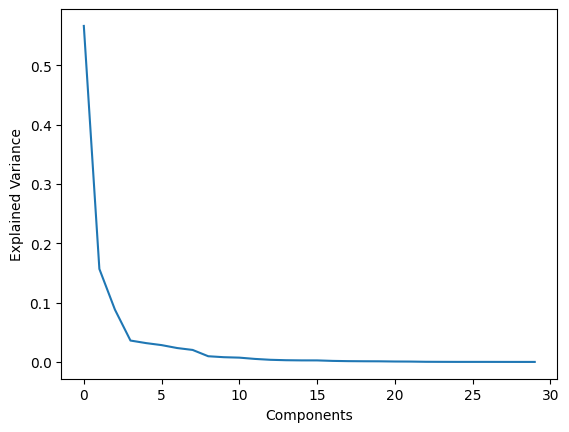

In [92]:
pca = PCA(n_components=fam_file2.shape[1])
pca.fit(x_std)

# Reformat and view results
loadings = pd.DataFrame(pca.components_.T,
    columns=['PC%s' % _ for _ in range(pca.n_components_)],
    index=fam_file2.columns)
print(loadings)

plot.plot(pca.explained_variance_ratio_)
plot.ylabel('Explained Variance')
plot.xlabel('Components')
plot.show()


,branch-instructions,branch-misses,bus-cycles,instructions1,cache-references,cpu-cycles,ref-cycles,instructions2,L1-dcache-load-misses,L1-dcache-loads,...,mem-stores,instructions8,cache-misses,L1-icache-load-misses,LLC-stores,instructions9,dTLB-loads,iTLB-loads,node-stores,instructions10
0,50482150.0,682133.0,2382843.0,253026098.0,6613462.0,407844460.0,357364950.0,193738347.0,3813004.0,56405993.0,...,46351552.0,253799057.0,835446.0,11806522.0,549614.0,250412546.0,72014747.0,22451.0,291627.0,251937818.0
1,51054334.0,679549.0,2390653.0,255782678.0,5683360.0,407533823.0,358237050.0,206115784.0,2810551.0,66543291.0,...,46546368.0,255883327.0,914193.0,11902597.0,548617.0,256874924.0,61540731.0,43650.0,185181.0,215326411.0
2,51297783.0,690895.0,2390982.0,257220587.0,2365022.0,406411631.0,357525150.0,256503753.0,2148499.0,73863192.0,...,46302110.0,253339379.0,920683.0,12015992.0,556241.0,256388156.0,70091337.0,12812.0,232379.0,245066956.0
3,51238860.0,683592.0,2388712.0,256608222.0,2327694.0,403894035.0,358102950.0,255159768.0,2604848.0,68076958.0,...,46585224.0,255954582.0,1044850.0,11743521.0,558675.0,255638598.0,65946317.0,21826.0,218562.0,230905270.0
4,48281136.0,661007.0,2402530.0,242055552.0,2377238.0,407101828.0,359940900.0,257075682.0,2123039.0,72142618.0,...,46889831.0,256240021.0,871636.0,11843970.0,536226.0,251566655.0,59159670.0,34116.0,198954.0,206959973.0


In [45]:
len(file_1.columns)

39